In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

from tqdm import tqdm
import seaborn as sns
import time
from IPython.display import HTML
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [2]:
torch.manual_seed(0)

In [3]:
my_cmap = colors.LinearSegmentedColormap.from_list(" ", ["red", "yellow", "green"])

In [4]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


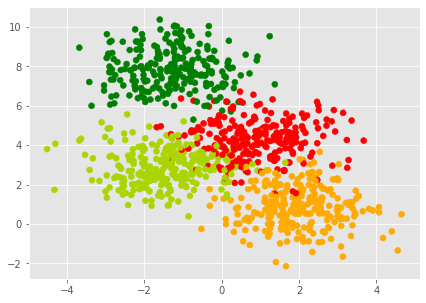

In [5]:
plt.figure(figsize = (7, 5))
plt.style.use('ggplot')
plt.scatter(data[:, 0], data[:,1], c = labels, cmap = my_cmap)


In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, Y_train.shape)

(750, 2) (750,)


In [7]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

In [8]:
def model(x):
    
    a1 = torch.matmul(x, weights1) + bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, weights2) + bias2
    h2 = a2.exp() / a2.exp().sum(-1).unsqueeze(-1)
    
    return h2
    

In [9]:
def loss_fn(y_hat, y):
    
    return -(y_hat[range(y.shape[0]), y].log()).mean()

In [10]:
def accuracy(pred, y):
    y_hat = torch.argmax(pred, dim = 1)
    return (y_hat == y).float().mean()

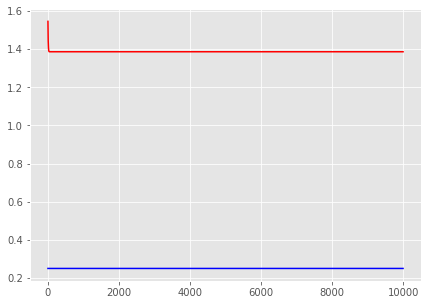

Loss Before Training 1.5456441640853882


In [11]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad = True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad = True)

learning_rate = 0.1
epochs = 10000
X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for i in range(epochs):
    
    y_hat = model(X_train)
    loss = loss_fn(y_hat, Y_train)
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    
    with torch.no_grad():
        weights1 -= learning_rate * weights1
        weights2 -= learning_rate * weights2
        bias1 -= learning_rate * bias1
        bias2 -= learning_rate * bias2
        weights1.grad.zero_()
        weights2.grad.zero_()
        bias1.grad.zero_()
        bias2.grad.zero_()
        
plt.figure(figsize = (7, 5))
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss Before Training', loss_arr[0])

In [12]:
import torch.nn.functional as F

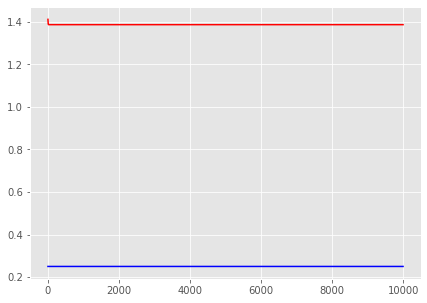

Loss Before Training 1.4111980199813843
Wall time: 45.8 s


In [13]:
%%time
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad = True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad = True)

learning_rate = 0.2
epochs = 10000
X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for i in range(epochs):
    
    y_hat = model(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    
    with torch.no_grad():
        weights1 -= learning_rate * weights1
        bias1 -= learning_rate * bias1
        weights2 -= learning_rate * weights2
        bias2 -= learning_rate * bias2
        weights1.grad.zero_()
        weights2.grad.zero_()
        bias1.grad.zero_()
        bias2.grad.zero_()
        
plt.figure(figsize = (7, 5))
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss Before Training', loss_arr[0])

In [14]:
import torch.nn as nn

In [15]:
class FirstNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.weights1 = nn.Parameter(torch.randn(2, 2)) / math.sqrt(2)
        self.bias1 = nn.Parameter(torch.randn(2))
        self.weights2 = nn.Parameter(torch.randn(2, 4)) / math.sqrt(2)
        self.bias2 = nn.Parameter(torch.randn(4))
        
    def forward(self, X):
        
        a1 = torch.matmul(X, self.weights1) + self.bias1
        h1 = a1.sigmoid()
        a2 = torch.matmul(h1, self.weights2) + self.bias2
        h2 = a2.exp() / a2.exp().sum(-1).unsqueeze(-1)
        
        return h2
    
        

In [16]:
def fit(epochs = 100000, learning_rate = 2):
        loss_arr = []
        acc_arr = []
        
        for i in range(epochs):
            y_hat = fn(X_train)
            loss = F.cross_entropy(y_hat, Y_train)
            loss_arr.append(loss.item())
            acc_arr.append(accuracy(y_hat, Y_train))
            
            loss.backward(retain_graph = True)
            
            with torch.no_grad():
                for param in fn.parameters():
                    param -= learning_rate * param.grad
                fn.zero_grad()
        
        plt.plot(loss_arr, 'r-')
        plt.plot(acc_arr, 'b-')
        plt.show()
        print('Loss Before Trainig:', loss_arr[0])
        print('Loss After Training:', loss_arr[-1])

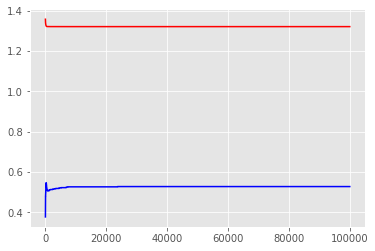

Loss Before Trainig: 1.3586821556091309
Loss After Training: 1.3220356702804565
Wall time: 5min 12s


In [17]:
%%time
fn = FirstNetwork()
fit()

In [18]:
class FirstNetwork_v1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(2, 2)
        self.lin2 = nn.Linear(2, 4)
    
    def forward(self, X):
        
        a1 = self.lin1(X)
        h1 = a1.sigmoid()
        a2 = self.lin2(h1)
        h2 = a2.exp() / a2.exp().sum(-1).unsqueeze(-1)
        return h2

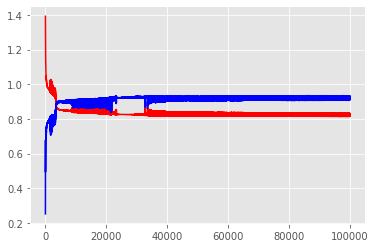

Loss Before Trainig: 1.3922843933105469
Loss After Training: 0.8154786825180054


In [20]:
fn = FirstNetwork_v1()
fit()

In [21]:
from torch import optim

In [41]:
def fit_v1(epochs = 10000000, learning_rate = 0.1):
    
    loss_arr = []
    acc_arr = []
    opt = optim.SGD(fn.parameters(), lr = learning_rate)
    
    for i in range(epochs):
        
        y_hat = fn(X_train)
        loss = F.cross_entropy(y_hat, Y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))
        
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    print("Loss Before Training:", loss_arr[0])
    print("Loss After Training:", loss_arr[-1])
    plt.figure(figsize = (7, 7))
    plt.plot(loss_arr, 'r-')
    plt.plot(acc_arr, 'b-')
    plt.show()

In [ ]:
%%time
fn = FirstNetwork_v1()
fit_v1()

In [35]:
class FirstNetwork_v2(nn.Module):
    
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(nn.Linear(2, 2), 
                                 nn.Sigmoid(), 
                                 nn.Linear(2, 4), 
                                 nn.Softmax())
    def forward(self, X):
        
        return self.net(X)
    

Loss Before Training: 1.395160436630249
Loss After Training: 0.8293671011924744


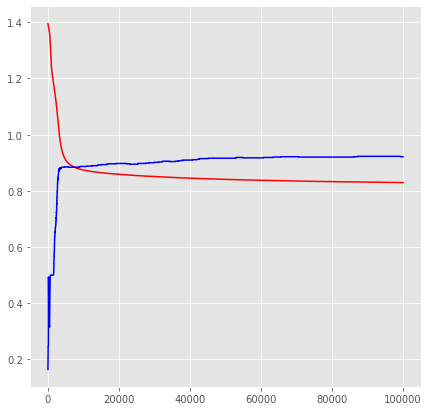

In [36]:
fn = FirstNetwork_v2()
fit_v1()

In [39]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
    
    for i in range(epochs):
        loss = loss_fn(model(x), y)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item()

In [40]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr = 1)
fit_v2(X_train, Y_train, fn,  opt, loss_fn)

0.8738409876823425